**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [7]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")
settings_dict = {'': 'name'}
ana = Analysis('comparison', settings_dict)

Visualization of the Train and Test Error (RMSE) Evolution. 


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>


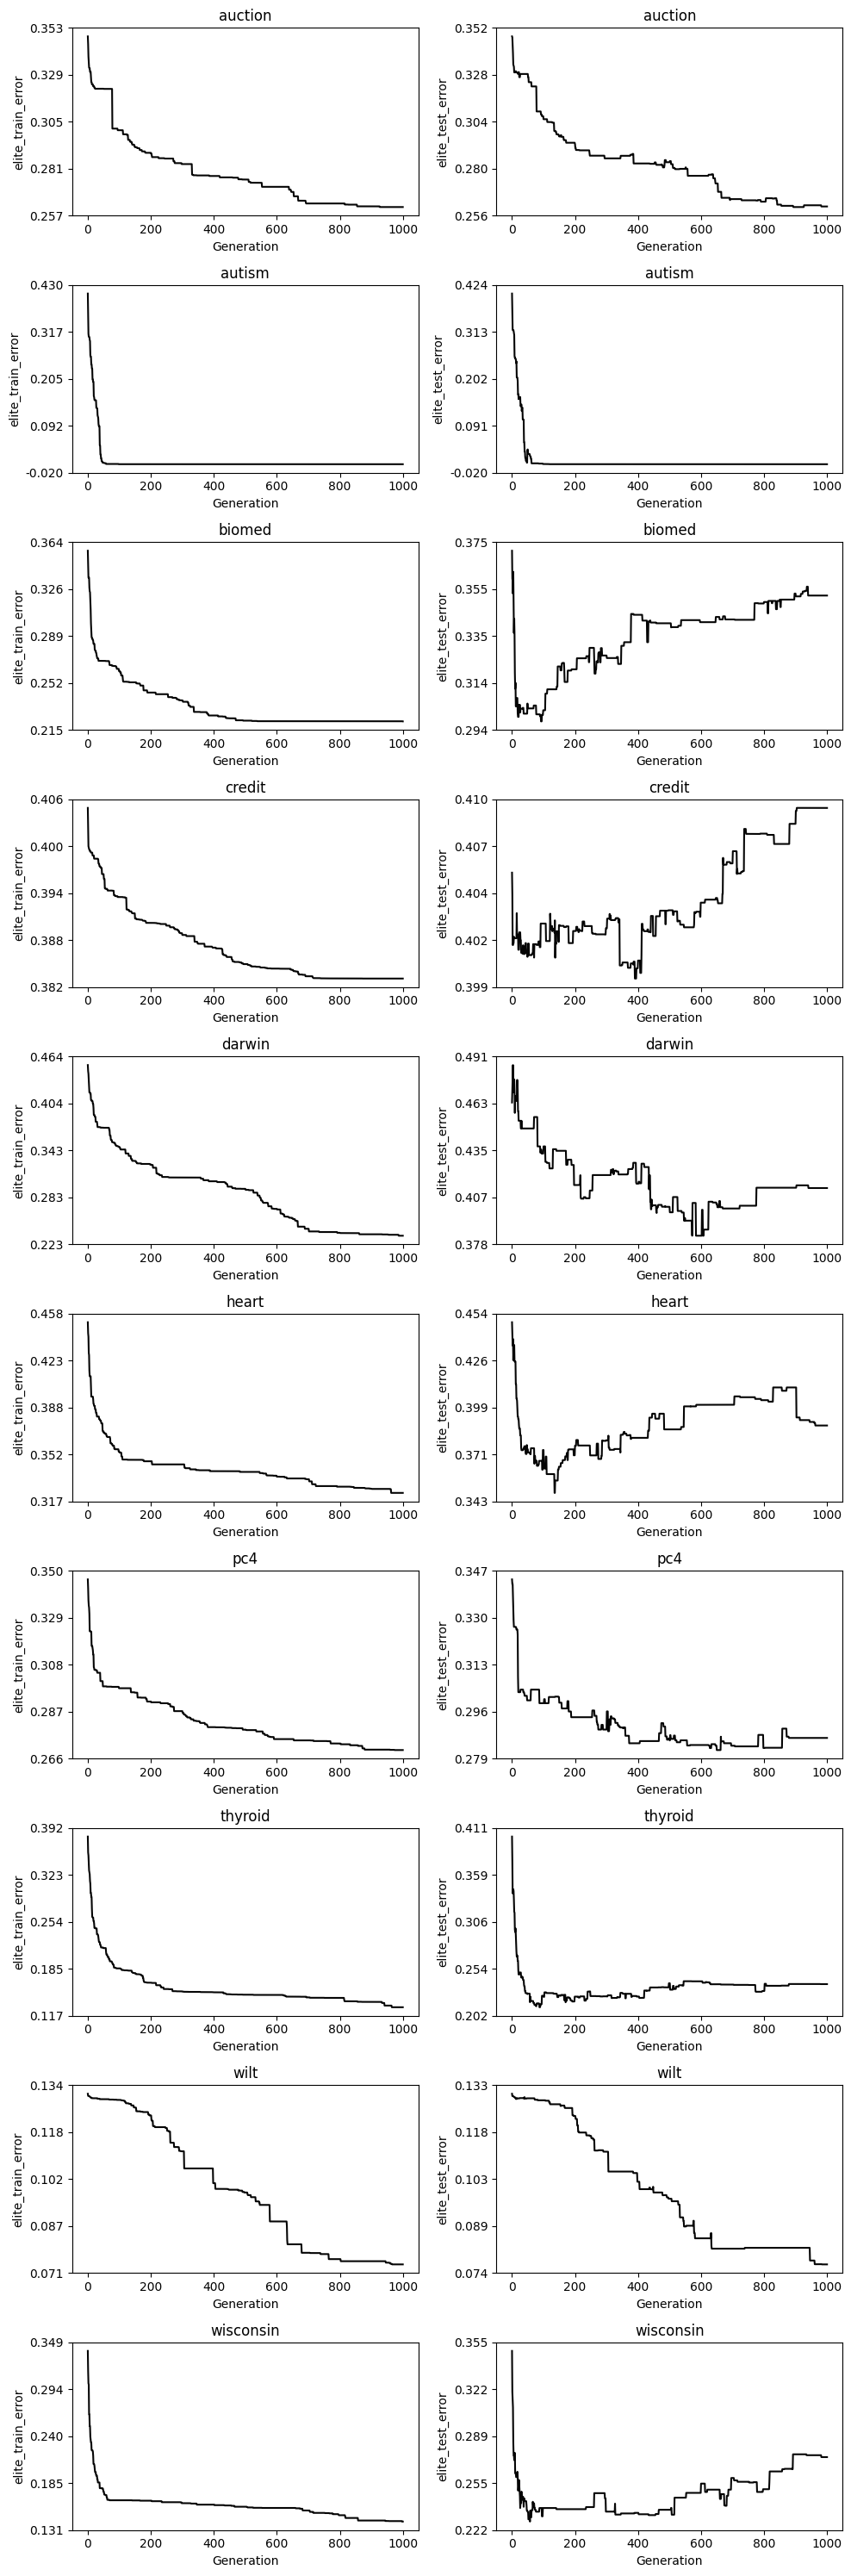

In [8]:
error_evolution_plot(ana.logs)

Median Test Error of the Final Individual

In [9]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GP_
dataset_name,
auction,864.0
autism,174.0
biomed,328.0
credit,345.0
darwin,82.0
heart,874.0
pc4,280.0
thyroid,268.0
wilt,411.0


In [10]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_
dataset_name,
auction,0.260853
autism,0.000000
biomed,0.352106
credit,0.409470
darwin,0.412195
heart,0.388103
pc4,0.286836
thyroid,0.236933
wilt,0.076692


P-Values of the Wilcoxon Test comparing the Test Error of the Final Individual

'+': Smaller Test Error at 5% significance level

'-': Larger Test Error at 5% significance level

'&approx;': No significant difference

In [11]:
get_slim_performance_difference_significance_table(ana.results, 'test.rmse')

KeyError: 'SLIM*SIG1_'

Visualization of the Tree Size Evolution


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

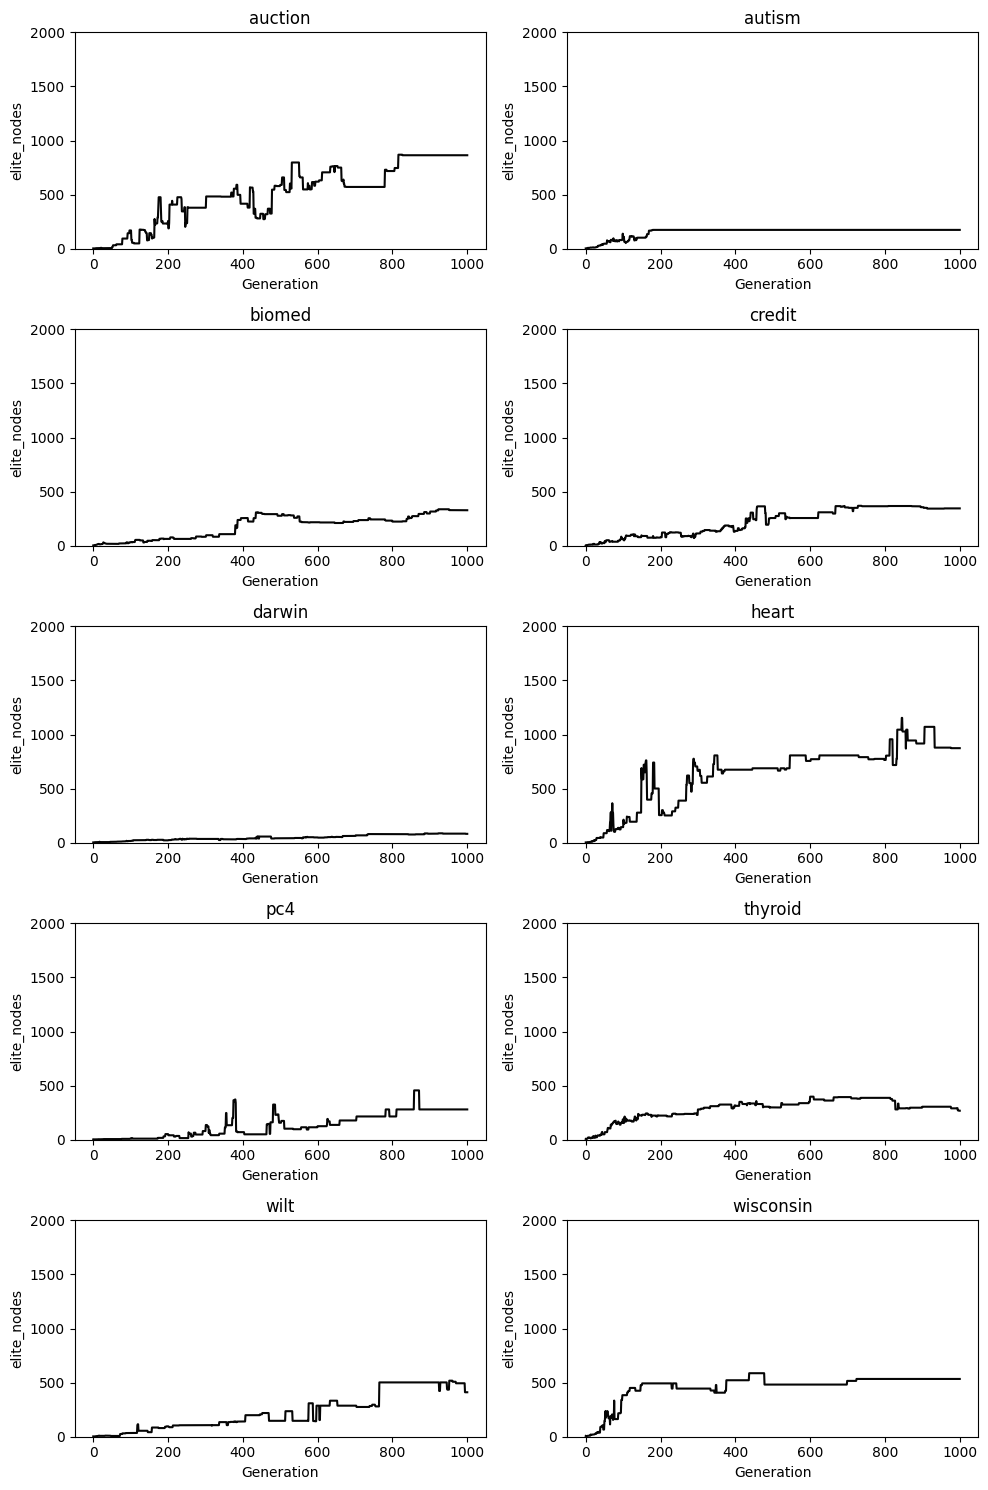

In [ ]:
tree_size_evolution_plot(ana.logs)

Median Tree Size of the final Individual 

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,GP_
dataset_name,
auction,864.0
autism,174.0
biomed,328.0
credit,345.0
darwin,82.0
heart,874.0
pc4,280.0
thyroid,268.0
wilt,411.0


In [ ]:
get_aggregated_performance(ana.results, metric='test.rmse', agg='median')

config_settings,GP_
dataset_name,
auction,0.260853
autism,0.000000
biomed,0.352106
credit,0.409470
darwin,0.412195
heart,0.388103
pc4,0.286836
thyroid,0.236933
wilt,0.076692


P-Values of the Wilcoxon Test comparing the Tree Size of the Final Individual

'+': Smaller Tree Size at 5% significance level

'-': Larger Tree Size at 5% significance level

'&approx;': No significant difference

In [ ]:
get_slim_performance_difference_significance_table(ana.results, metric = 'nodes_count')

KeyError: 'SLIM*SIG1_'

Plot for Comparison of the Average Rank accross Datasets regarding different Evaluation Metrics

<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

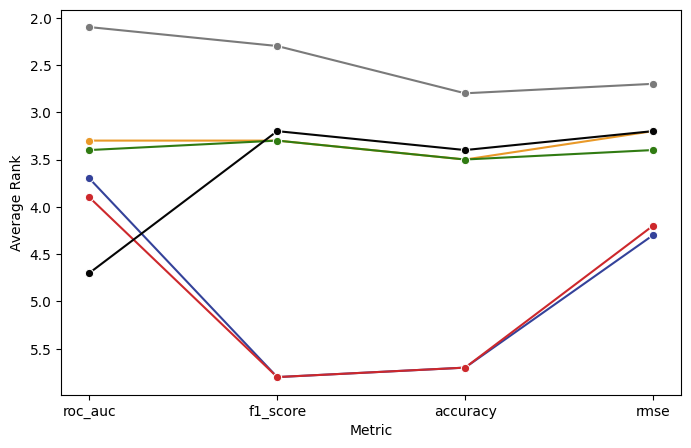

In [ ]:
plot_avg_ranking_multimetrix(ana.results)

Friedman Test results

In [ ]:
get_multimetric_ranking_significance(ana.results)

P-Value of the Friedman Test for ranks regarding Accuracy: 0.00180
P-Value of the Friedman Test for ranks regarding F1-Score: 0.00002
P-Value of the Friedman Test for ranks regarding ROC-AUC: 0.05276
P-Value of the Friedman Test for ranks regarding RMSE: 0.34711
